# Monte Carlo Simulation
Monte Carlo Simulation is a statistical technique that is used for the modeling and analysis of complex systems and allows to understand the impact of risk and uncertainty in prediction and forecasting models.






## Key Concepts
1. Random Variables: Variables whose possible values are outcomes of a random phenomenon.
2. Probability Distribution: Describes how the values of a random variable are distributed. For example: normal, uniform, and exponential distributions.
3. Simulation: The process of generating random variables to mimic the operation of complex systems.

## Steps
1. Identify the input variables and their respective probability distributions.
2. Develop a mathematical model that describes the system or process analyzed.
3. Use random sampling techniques to generate input values based on their defined probability distributions.
4. Run multiple iterations of the simulation, each time using a different set of random inputs, and calculate the output for each iteration.
5. Aggregate and analyze the outputs from the simulations to understand the range and likelihood of different outcomes.

## Example: estimating the value of Pi
1. We model the system by assuming that there is a square with a circle inscribed in it. The radius of the circle is 1, and hence, the side of the square is 2 and its area is 4.
2. We generate random points (x, y) within the square. Both x and y are random numbers between -1 and 1.
3. Count the number of points that fall inside the circle. A point (x, y) is inside the circle if $x^2 + y^2 \leq 1$.
4. The ratio of the number of points inside the circle to the total number of points, multiplied by 4, will approximate π.

In [4]:
import random

In [5]:
def estimate_pi(num_samples):
    inside_circle = 0

    for _ in range(num_samples):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            inside_circle += 1

    pi_estimate = (inside_circle / num_samples) * 4
    return pi_estimate

In [6]:
# Estimate Pi with 1000000 samples
# By increasing the number of samples, the estimate of π becomes more accurate.
num_samples = 1000000
pi_estimate = estimate_pi(num_samples)
print(f"Estimated Pi: {pi_estimate}")

Estimated Pi: 3.142032


## Visualization
Next we visualize this experiment using matplotlib for a set of 1000 samples.

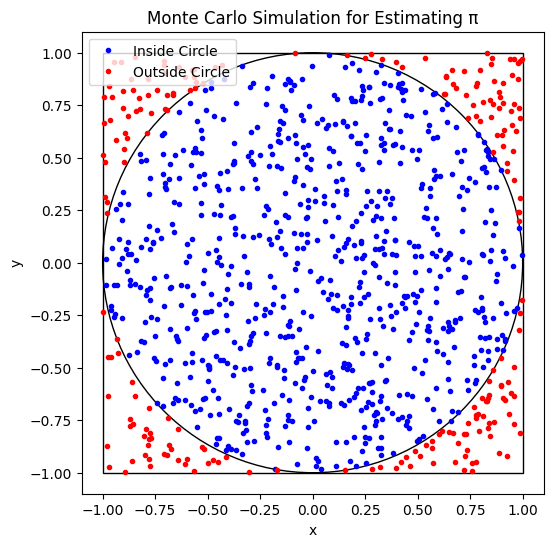

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of random points to generate
num_points = 1000

# Generate random points
x = np.random.uniform(-1, 1, num_points)
y = np.random.uniform(-1, 1, num_points)

# Determine which points fall inside the circle
inside_circle = x**2 + y**2 <= 1

# Plotting the square and the circle
fig, ax = plt.subplots(figsize=(6, 6))

# Plot points inside the circle
ax.plot(x[inside_circle], y[inside_circle], 'b.', label='Inside Circle')
# Plot points outside the circle
ax.plot(x[~inside_circle], y[~inside_circle], 'r.', label='Outside Circle')

# Draw the square
square = plt.Rectangle((-1, -1), 2, 2, fill=None, edgecolor='black')
ax.add_patch(square)

# Draw the circle
circle = plt.Circle((0, 0), 1, fill=None, edgecolor='black')
ax.add_patch(circle)

# Set the aspect of the plot to be equal
ax.set_aspect('equal')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Simulation for Estimating π')
plt.legend()

# Show plot
plt.show()

# Monte Carlo Simulation of a Stock Portfolio


When constructing a portfolio, the overall risk (variance) of the portfolio can be calculated using the covariance matrix, as the portfolio risk depends not only on the individual risks of the assets but also on how the returns of the assets are correlated with each other.

In [10]:
import pandas as pd
import datetime as dt
import yfinance as yf

def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    data = data['Adj Close']
    returns = data.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()

    return mean_returns, cov_matrix

In [14]:
tickers = ['AAPL', 'MSFT', 'GOOGL']
end_date = dt.datetime(2023, 1, 1)
start_date = end_date - dt.timedelta(days=365)

In [15]:
mean_returns, cov_matrix = get_data(tickers, start_date, end_date)

[*********************100%%**********************]  3 of 3 completed


In [22]:
weights = np.random.random(len(tickers))
weights /= np.sum(weights)
print(weights)

[0.17627806 0.07400133 0.74972062]


We will assume that daily returns are distributed by a Multivariate Normal Distribution

$R_{t} \sim MVN(μ, Σ)$



Cholesky Decomposition is used to determine the Lower Triangular Matrix

$L \in LL' = Σ$ \\$R_{t} = μ + LZ_{t}$ \\$Z_{t} \sim N(0,I)$
where $Z_{t}$ are the samples from a normal distribution and $I$ is the identity matrix.











In [60]:
# Monte Carlo Simulations

mc_simulations = 100  # Number of Monte Carlo simulations
T = 100  # Number of days to simulate

_mean_returns = np.full(shape=(T, len(weights)), fill_value=mean_returns).T
portfolio_simulations = np.zeros(shape=(T, mc_simulations))
initial_portfolio = 10000

for m in range(0, mc_simulations):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_matrix)
    daily_returns = _mean_returns + np.inner(L, Z)
    portfolio_simulations[:, m] = np.cumprod(np.inner(weights, daily_returns.T) + 1) * initial_portfolio

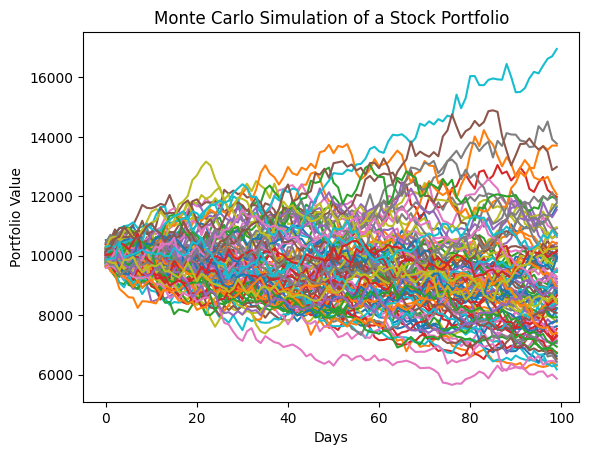

In [61]:
plt.plot(portfolio_simulations)
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.title('Monte Carlo Simulation of a Stock Portfolio')
plt.show()

# Value-at-Risk (VaR)
VaR estimates the maximum loss that a portfolio could suffer with a given probability over a specified time horizon. For example, a 1-day VaR at a 95% confidence level indicates that there is a 95% chance the portfolio will not lose more than the VaR amount in a single day.






## Key Components of VaR
1. Confidence Level: The probability that the loss will not exceed a certain amount. Common confidence levels are usually 95%, 99%, and 99.9%.
2. Time Horizon: The period over which the risk is assessed. Typical time horizons are 1 day, 10 days, or 1 month.
3. Loss Amount: The maximum loss that is expected not to be exceeded with the given confidence level over the specified time horizon.

## Calculation Methods
There are several methods to calculate VaR, each with its own assumptions and complexities:

1. Historical Simulation uses historical returns to simulate future losses. No assumptions about the distribution of returns.
2. Variance-Covariance (Parametric) Method assumes returns are normally distributed. Uses the mean and standard deviation of portfolio returns.
3. Monte Carlo Simulation uses random sampling and statistical modeling to estimate potential losses.



In [62]:
def MC_VaR(returns, confidence_level=5):

    """
    returns: pandas series of returns
    confidence_level: confidence level in percentage

    output: VaR at the specified confidence level
    """

    if isinstance(returns, pd.Series):
      return np.percentile(returns, confidence_level)
    else:
      return TypeError("Expected a pandas data series.")

# Conditional Value at Risk (CVaR)
CVaR, also known as Expected Shortfall, is a risk assessment measure that quantifies the tail risk of an investment portfolio. It is an extension of Value at Risk (VaR), providing more information about the risk of extreme losses.

CVaR estimates the average loss that occurs beyond the VaR threshold. In other words, CVaR is the expected loss given that the loss is greater than or equal to the VaR.

In [63]:
def MC_CVaR(returns, confidence_level=5):

    """
    returns: pandas series of returns
    confidence_level: confidence level in percentage

    output: CVaR at the specified confidence level
    """

    if isinstance(returns, pd.Series):
      belowVar = returns <= MC_VaR(returns, confidence_level=confidence_level)
      return returns[belowVar].mean()
    else:
      return TypeError("Expected a pandas data series.")

In [64]:
portfolio_results = pd.Series(portfolio_simulations[:, -1])  # Assuming the last simulation is the final portfolio value

In [65]:
var = initial_portfolio - MC_VaR(portfolio_results)
cvar = initial_portfolio - MC_CVaR(portfolio_results)

In [66]:
print(f"VaR: {var:.2f}")
print(f"CVaR: {cvar:.2f}")

VaR: 505.23
CVaR: 633.29


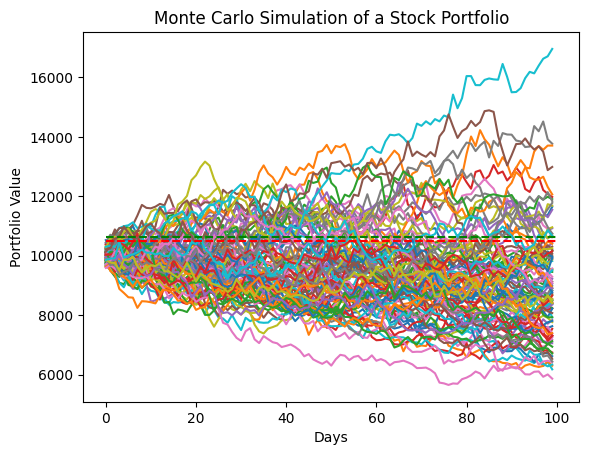

In [67]:
plt.plot(portfolio_simulations)
plt.hlines(initial_portfolio + var, xmin=0, xmax=T, colors='r', linestyles='dashed', label='VaR')
plt.hlines(initial_portfolio + cvar, xmin=0, xmax=T, colors='g', linestyles='dashed', label='CVaR')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.title('Monte Carlo Simulation of a Stock Portfolio')
plt.show()

# References

 1. [Monte Carlo Simulation](https://www.youtube.com/watch?v=7ESK5SaP-bc)
 2. [Duffie, Darrell, and Jun Pan. "An overview of value at risk." Journal of derivatives 4.3 (1997): 7-49.](https://web.mit.edu/people/junpan/ddjp.pdf)
 3. [Monte Carlo Simulation for Option Pricing with Python (Basic Ideas Explained)](https://www.youtube.com/watch?v=pR32aii3shk)
 4. [Monte Carlo Simulation with value at risk (VaR) and conditional value at risk (CVaR) in Python](https://www.youtube.com/watch?v=f9MAFvP5-pA)